In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1pUG3KKu7-fLBulAWD5iufk2oN-VHTsdt"
output_file = "Brain_Tumor_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1pUG3KKu7-fLBulAWD5iufk2oN-VHTsdt
From (redirected): https://drive.google.com/uc?id=1pUG3KKu7-fLBulAWD5iufk2oN-VHTsdt&confirm=t&uuid=b492a677-d891-4b56-bc38-3c4785b08f0d
To: /content/Brain_Tumor_Datasets.zip
100%|██████████| 32.9M/32.9M [00:00<00:00, 42.8MB/s]


'Brain_Tumor_Datasets.zip'

In [3]:
import zipfile
z= zipfile.ZipFile('/content/Brain_Tumor_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Brain_Tumor_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Brain_Tumor_Datasets' to 'datasets/Brain_Tumor_Datasets' successfully.


## **Importing libraries**

In [ ]:
import yaml

# Define YAML configuration
data = {
    'path': 'Brain_Tumor_Datasets',
    'train': 'train',
    'test': 'test',
    'val': 'train',
    'nc': 2,
    'names': ['Normal','Brain Tumor']
}

# Save to pothole.yaml
with open('Brain_Tumor_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Brain_Tumor_Datasets.yaml created successfully!")


Brain_Tumor_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [8]:
from ultralytics import YOLO

# Load a YOLOv11 classification model
model = YOLO('yolo11l-cls.pt')  # Replace with 'yolo11m-cls.pt' or similar for better accuracy

# Train the classification model
model.train(
    data='Brain_Tumor_Datasets',
    epochs=50,
    imgsz=224,
    batch=8,
    name='Brain_Tumor_Datasets_yolo11',
    save=True,
    save_period=-1,
    patience=20,
    val=True,
    degrees=15,       # Rotation
    flipud=0.3,       # Vertical flip probability
    fliplr=0.5,       # Horizontal flip probability
    scale=0.5,        # Image scaling
    shear=10,         # Shear angle
    translate=0.1     # Translation
)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 27.2M/27.2M [00:00<00:00, 84.2MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Brain_Tumor_Datasets, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Brain_Tumor_Datasets_yolo11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=1

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 52.0±80.9 MB/s, size: 13.4 KB)


train: Scanning /content/datasets/Brain_Tumor_Datasets/train... 3598 images, 0 corrupt: 100%|██████████| 3598/3598 [00:00<00:00, 4647.22it/s]

train: New cache created: /content/datasets/Brain_Tumor_Datasets/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 16.7±27.0 MB/s, size: 7.5 KB)


val: Scanning /content/datasets/Brain_Tumor_Datasets/test... 193 images, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 1733.35it/s]

val: New cache created: /content/datasets/Brain_Tumor_Datasets/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/Brain_Tumor_Datasets_yolo11
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.586G      0.718          8        224:   1%|          | 3/450 [00:00<01:47,  4.18it/s]

       1/50     0.719G     0.7642          8        224:   2%|▏         | 10/450 [00:01<00:54,  8.12it/s]
100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 13.70it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 25.70it/s]

                   all      0.679          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.33it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.03it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 20.18it/s]

                   all      0.819          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.68it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 16.47it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.21it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 18.00it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50      1.39G     0.2849          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.07it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50       1.5G     0.2703          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 16.63it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50      1.54G     0.2358          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.50it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      1.64G     0.2492          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 16.44it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50      1.68G     0.2232          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.55it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50      1.75G     0.2046          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 15.83it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50      1.84G     0.2081          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.95it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      1.92G     0.1765          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 16.05it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      1.96G     0.1888          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.09it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50      2.04G     0.1696          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 17.21it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50      2.16G     0.1539          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.13it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50       2.2G     0.1475          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 16.38it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50      2.26G     0.1378          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.45it/s]

                   all      0.902          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50      2.38G     0.1346          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 17.39it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50      2.42G     0.1251          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.21it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50       2.5G     0.1329          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.27it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50      2.56G     0.1029          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.16it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50      2.68G     0.1321          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.09it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50      2.72G     0.1185          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.48it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50       2.8G     0.1046          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.83it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50      2.86G    0.09523          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.18it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      2.95G     0.1102          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.88it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50         3G    0.08799          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 25.07it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      3.09G    0.09162          6        224: 100%|██████████| 450/450 [00:45<00:00,  9.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 25.50it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50      3.14G    0.09311          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 17.64it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      3.25G    0.08561          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.52it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50      3.31G    0.08067          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 25.48it/s]

                   all      0.912          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50       3.4G    0.06641          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.57it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50      3.45G    0.07828          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.59it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50      3.57G    0.07692          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 27.45it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50      3.61G    0.07578          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.05it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50      3.67G    0.07311          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.17it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50      3.78G    0.06163          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.84it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50      3.82G    0.06114          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.49it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50      3.94G    0.05342          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.64it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50      3.98G    0.04403          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 25.54it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50      4.04G    0.04982          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.87it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50      4.16G    0.05137          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.89it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50       4.2G    0.04562          6        224: 100%|██████████| 450/450 [00:44<00:00, 10.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 25.85it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50      4.28G    0.04774          6        224: 100%|██████████| 450/450 [00:42<00:00, 10.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 24.86it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50      4.34G    0.04647          6        224: 100%|██████████| 450/450 [00:43<00:00, 10.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 26.43it/s]

                   all      0.922          1



50 epochs completed in 0.625 hours.
Optimizer stripped from runs/classify/Brain_Tumor_Datasets_yolo11/weights/last.pt, 25.9MB
Optimizer stripped from runs/classify/Brain_Tumor_Datasets_yolo11/weights/best.pt, 25.9MB

Validating runs/classify/Brain_Tumor_Datasets_yolo11/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-cls summary (fused): 94 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/Brain_Tumor_Datasets/train... found 3598 images in 2 classes ✅ 
val: /content/datasets/Brain_Tumor_Datasets/test... found 193 images in 2 classes ✅ 
test: /content/datasets/Brain_Tumor_Datasets/test... found 193 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:00<00:00, 21.41it/s]


                   all      0.938          1
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/Brain_Tumor_Datasets_yolo11


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd7e3592710>
curves: []
curves_results: []
fitness: 0.9689119160175323
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9378238320350647, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9689119160175323}
save_dir: PosixPath('runs/classify/Brain_Tumor_Datasets_yolo11')
speed: {'preprocess': 0.07789967875929044, 'inference': 2.130770575130805, 'loss': 0.0008664507727024696, 'postprocess': 0.001249217616838712}
task: 'classify'
top1: 0.9378238320350647
top5: 1.0


image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1951.jpg: 224x224 YES 1.00, NO 0.00, 11.2ms
Speed: 2.4ms preprocess, 11.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/NO/no_73.jpg: 224x224 YES 0.95, NO 0.05, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1980.jpg: 224x224 YES 1.00, NO 0.00, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1981.jpg: 224x224 YES 1.00, NO 0.00, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Brain_Tumor_Datasets/test/YES/yes_1955.jpg: 224x224 YES 1.00, NO 0.00, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 0.0ms postprocess per image at shape (1, 3, 22

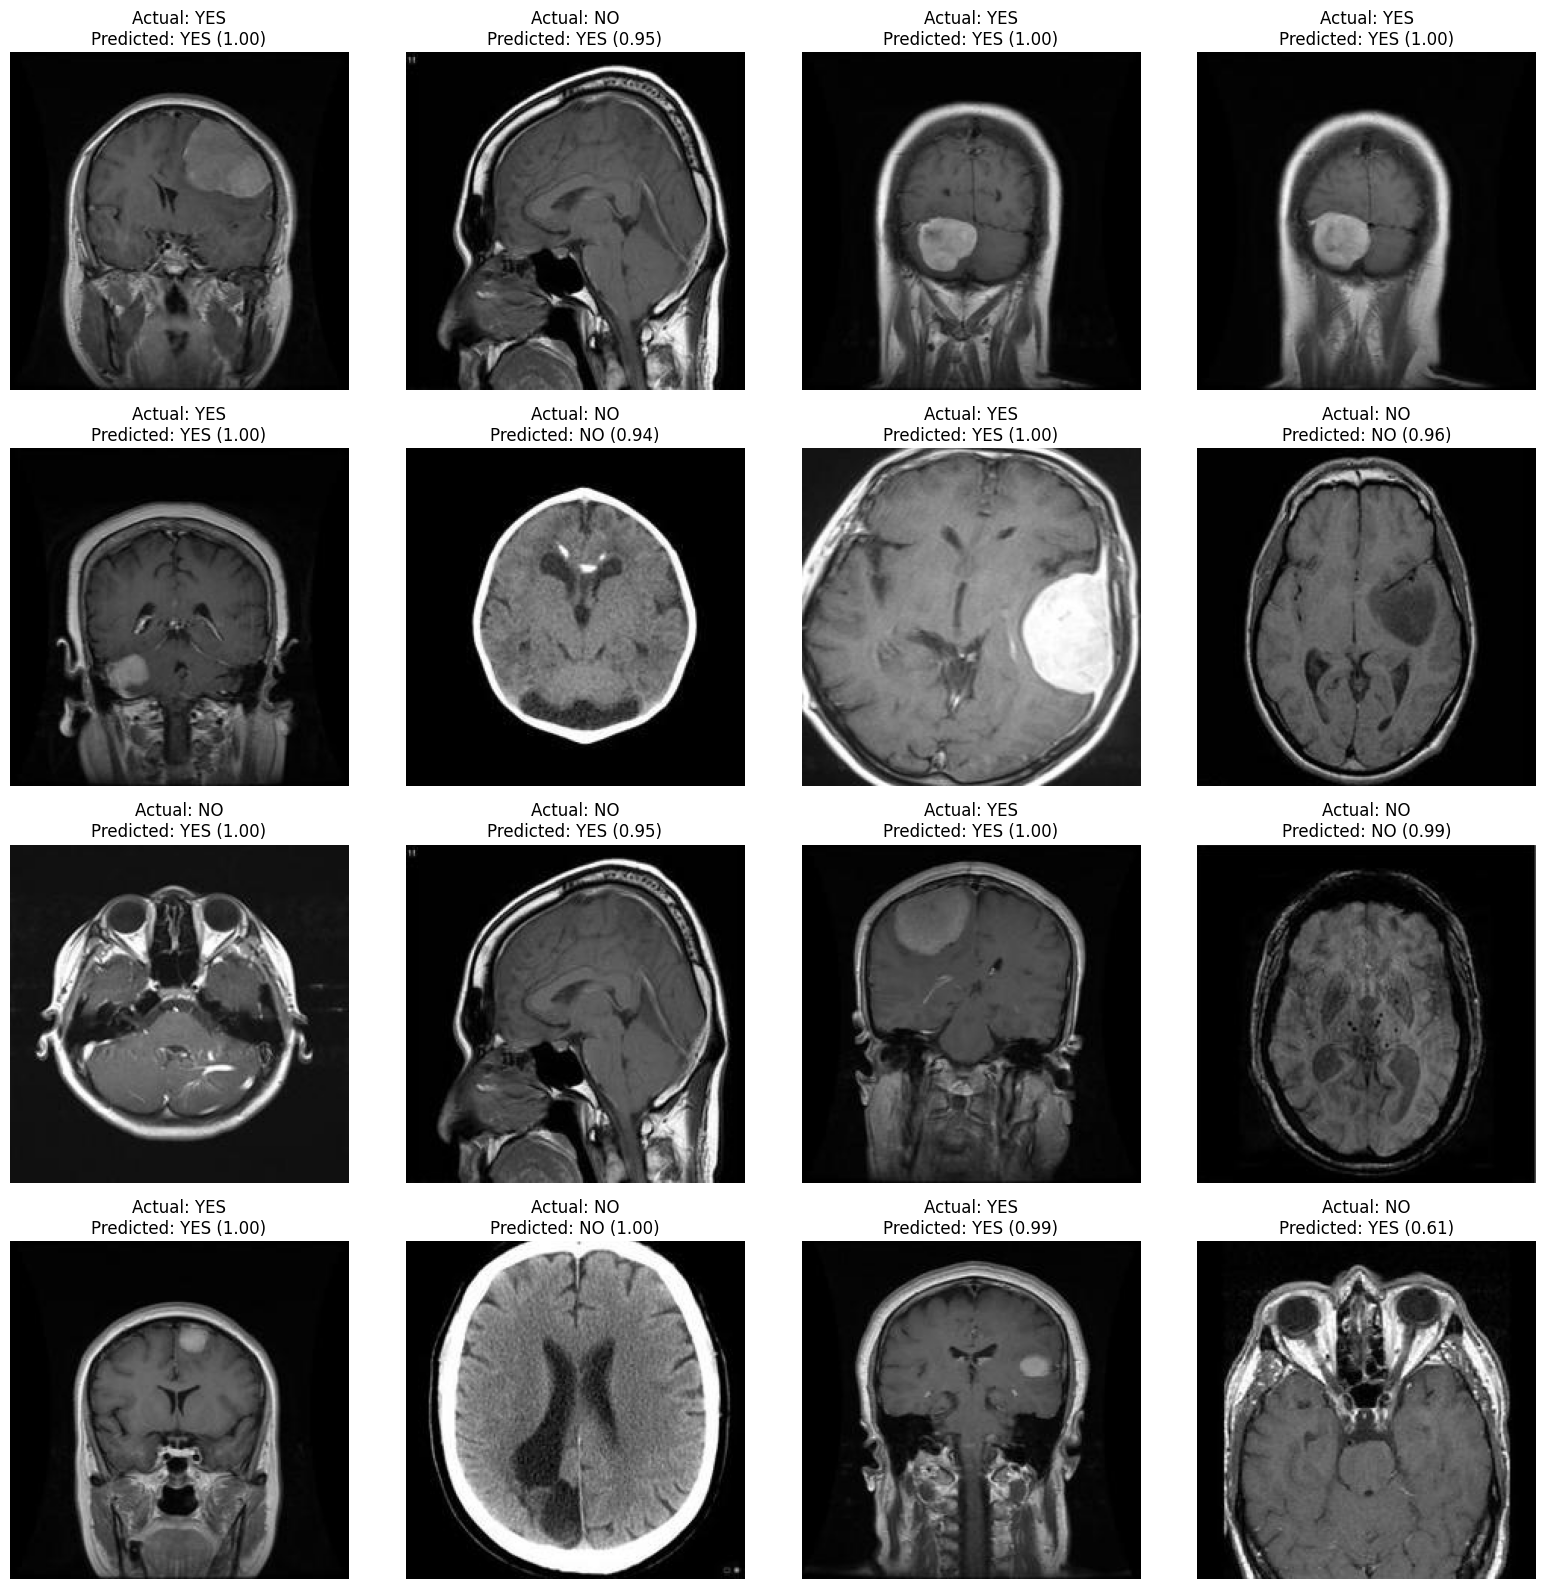

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained classification model
model = YOLO('runs/classify/Brain_Tumor_Datasets_yolo11/weights/best.pt')

# Test images directory
test_images_folders = 'datasets/Brain_Tumor_Datasets/test'

# Get list of image files
image_folders = os.listdir(test_images_folders)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_folder = random.choice(image_folders)
    img_files = os.listdir(os.path.join(test_images_folders,img_folder))
    img_path = os.path.join(test_images_folders, img_folder, random.choice(img_files))
    image = cv2.imread(img_path)

    # Perform classification inference
    results = model(img_path)  # returns a list with one result
    result = results[0]

    # Get predicted class name
    class_id = int(result.probs.top1)
    class_name = model.names[class_id]
    confidence = result.probs.top1conf.item()

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with class name and confidence
    ax[idx].imshow(image_rgb)
    ax[idx].set_title(f"Actual: {img_folder}\nPredicted: {class_name} ({confidence:.2f})", fontsize=12)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
